In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

First, we need to load the data into a pandas dataframe

In [2]:
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit in $10,000s')

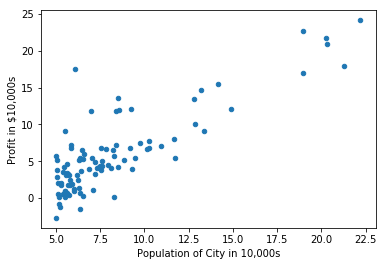

In [3]:
data.plot(kind='scatter', x='Population', y='Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In order to implement gradient descent, we need to set up a couple of things first. We need to set up our X matrix, y vector, and theta vector. Additionally we are going to set the number of iterations of gradient descent we want to run and the alpha (or steps) each iteration will take. 

In [4]:
data.insert(0, 'Ones', 1)

In [5]:
X = data.iloc[:, 0:len(data.columns)-1]
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [6]:
y = data.iloc[:, len(data.columns)-1: len(data.columns)]
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [7]:
theta = np.matrix([[0.0,0.0]])
theta

matrix([[0., 0.]])

In [8]:
X = np.matrix(X)
y = np.matrix(y)
iterations = 1500
alpha = 0.01

In addtion to the previous set up, we also need to set up the function computeCost so that we can compute the cost at each iteration of gradient descent. We hope to minimize this function

In [9]:
def computeCost(X, y, theta):
    m = np.size(X, 0) # get number of columns
    h = X * theta.transpose()
    cost = np.square(h - y); 
    return cost.sum()/(2*m)

In [10]:
computeCost(X, y, theta)

32.072733877455676

As you can see, if theta is just made up of zeros, the cost is the correct value of around 32.07

Now that our computeCost function is working, we can now start on the gradient descent function

In [11]:
def gradientDescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    m = np.size(X, 0)
    for i in range(iterations):
        error = X * theta.transpose() - y
        for j in range(np.size(theta, 1)):
            theta[0,j] = theta[0,j] - alpha * (np.multiply(error, X[:, j]).sum()/m)

        cost[i] = computeCost(X, y, theta)
    
    return theta, cost      



In [12]:
finaltheta, finalcost = gradientDescent(X, y, theta, iterations, alpha)

In [13]:
finaltheta

matrix([[-3.63029144,  1.16636235]])

In [14]:
computeCost(X, y, finaltheta)

4.483388256587726

As you can see, our gradient descent function minimizes the cost function to around 4.48. Here is a graph that shows the resulting linear regression

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

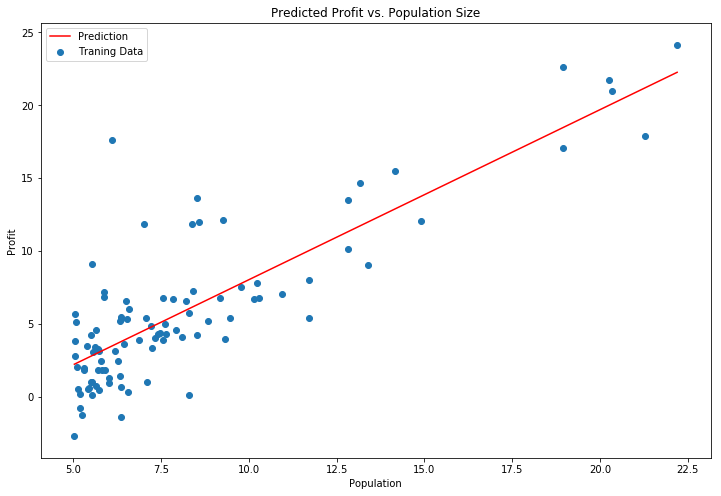

In [15]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = finaltheta[0, 0] + (finaltheta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

# Linear regression with multiple variables

Now we are going to focus on linear regression with multiple variables. First lets load in the data set.

In [16]:
data = pd.read_csv('ex1data2.txt', names=['Size (square feet)', 'Num Bedrooms', 'Price'])
data.head()

,Size (square feet),Num Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In our data set, the price is a drastically higher number than then number of bedrooms. This is a problem because this drastic difference will cause gradient descent to run longer. In order to solve this problem, we will define a function that normalizes the features of the given data frame.

In [17]:
def normalize(df):
    return (df - df.mean())/df.std()

In [18]:
normalizedData = normalize(data)
normalizedData.head()

,Size (square feet),Num Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now that the data is normalized, we can set up our code so that it is ready for gradient descent on a univariate regression problem. 

In [19]:
normalizedData.insert(0, 'Ones', 1)

In [20]:
X = normalizedData.iloc[:, 0:len(normalizedData.columns)-1]
y = normalizedData.iloc[:, len(normalizedData.columns)-1: len(normalizedData.columns)]

theta = np.matrix([[0.0,0.0,0.0]])
X = np.matrix(X)
y = np.matrix(y)

In [21]:
finaltheta, finalcost = gradientDescent(X, y, theta, iterations, alpha)

In [22]:
finaltheta

matrix([[-9.98373960e-17,  8.84042349e-01, -5.24551809e-02]])

In [23]:
finalcost

array([0.4805491 , 0.47198588, 0.46366462, ..., 0.13068671, 0.13068671,
       0.13068671])

This concludes assignment 1!